# Линейна и логистична регресия

Целите днес:

Теория:
* Линейна регресия
* Логистична регресия
* Тренировъчно и тестово множество данни (train and test set) 
* Пренагаждане (Overfitting) и underfitting
* Регуляризация


Практика: 
* Да разгледаме scikit-learn 
* Да вземем примерни данни, да ги разделим на тренировъчни и тестови, и да пуснем регресия върху тях


Преди това, нека си припомним неща от миналия път.

## Какво са $X$ и $y$?

$X$ и $y$ са входните данни на нашия алгоритъм за машинно самообучение. $X$ е матрица (таблица) от данни, където всеки ред е инстанция на данните, а всяка колона е различна тяхна характеристика. $y$ пък е списък с целеви стойности (labels).

Ако се опитваме да оценим цената на апартаменти в град, всеки ред в $X$ е апартамент (чиято цена знаем), а всяка колона е различна характеристика на апартамента (площ, оценка на квартала, близост до метро, престъпност наоколо и т.н.). $y$ съдържа цените, като първия ред на $X$ съотвества на цената на първия ред от $y$, втория ред на $X$ съответства на втория ред от $y$ и т.н.

## Какво са features (характеристики)?

Набора от характеристики, които знаем за данните. Алгоритмите търсят статистическа зависимост между тях и търсения отговор (напр. връзка между площ и цена).

## Каква е разликата между supervised и unsupervised learning?

При supervised learning имаме данни с етикети (вектора $y$) и търсим зависимости между $X$ и $y$. При unsupervised learning нямаме етикети и се опитваме да намерим генерални характеристики на dataset-а.

## Каква е разликата между регресия и класификация?

Регресията търси отговор в непрекъснато пространство (цена на апартамент), докато класификацията търси отговор, който обикновено е една от две стойности (дали даден имейл е спам или не).

Бележка: класификацията може да работи с няколко категории, като има различни похвати за това (напр. one-vs-all).

Малко код, който ни трябва:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="sklearn", message="^Objective did not")

# Линейна регресия

Линейната регресия е алгоритъм, който се опитва да намери линейна функция (в линейно пространство), която приближава входните данни най-точно. Пространството има толкова измерения, колкото характеристика има в набора от данни.

Например:

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


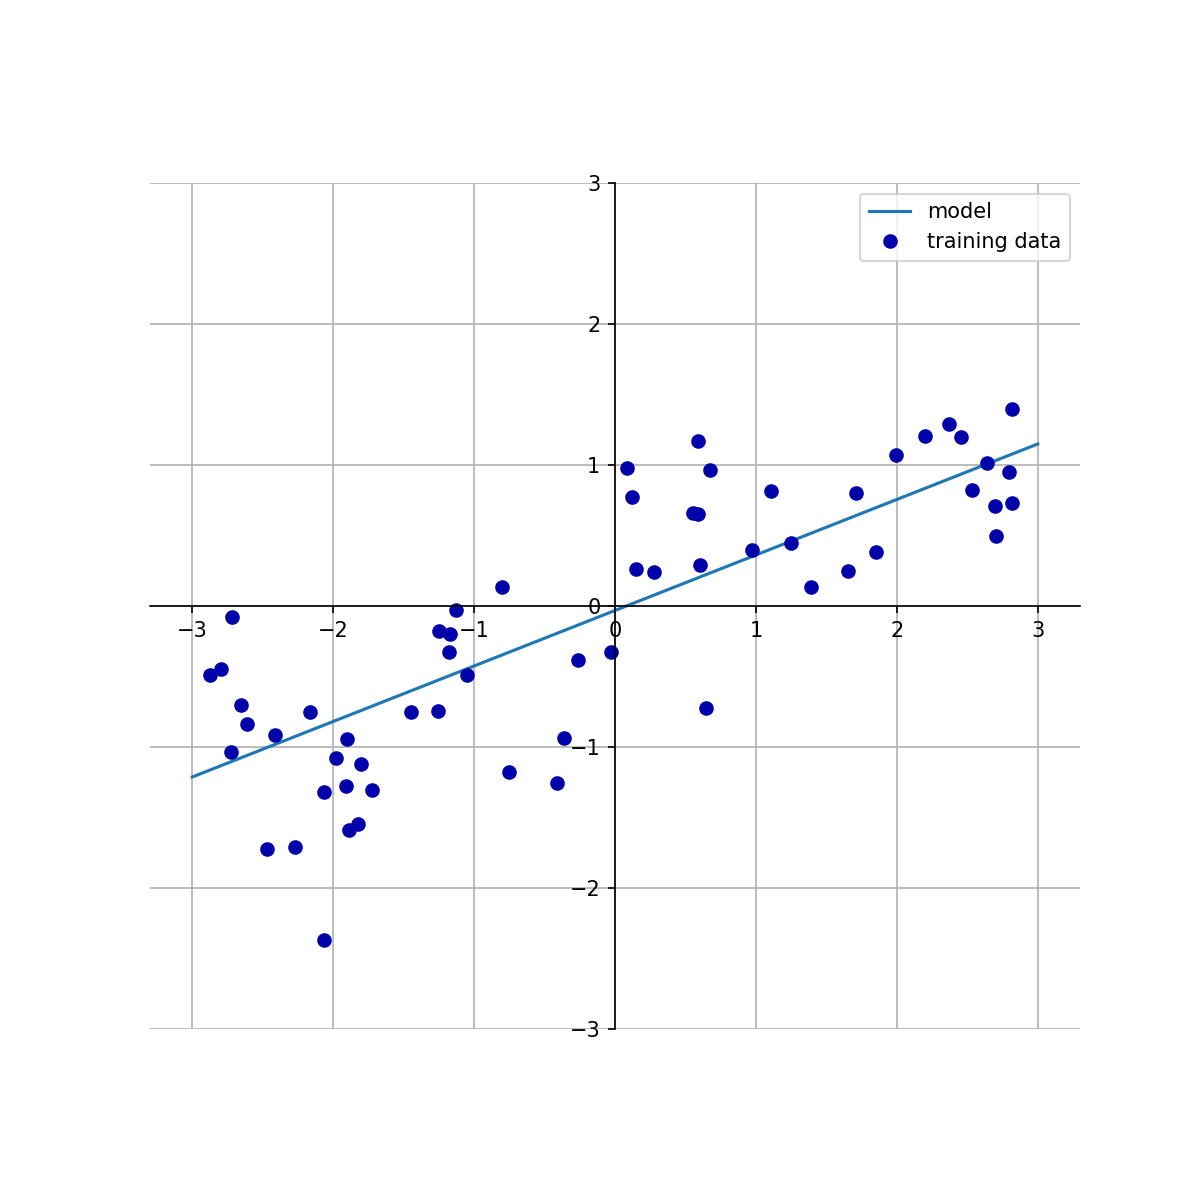

In [2]:
mglearn.plots.plot_linear_regression_wave()

При функция на един аргумент (едномерно линейно пространство), функцията има вида:

$$y = ax + b$$

И алгоритъма търси $a$ и $b$, които да минимизират общата грешка за елементите от $X$ и $y$

При тримерно пространство, формулата е:

$$y = ax_1 + bx_2 + cx_3 + d$$

Алгоритъма търси $a$, $b$, $c$ и $d$.

Разбира се, това се генерализира за n-мерно пространство:

$$y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$$

Където търсим $a_0 \ldots a_n$.

Обърнете вниманние, че има $a_0$, но няма $x_0$ (или поне, $x_0$ = 1).

Следва малко по-формална дефиниция, която на този етап може да пропуснете. Споменаваме я, защото става въпрос на лекцията.

В горния пример, говорим за грешка $E$, която линейна функция $f$ има спрямо входните данни. Тя може да се дефинира така:

$$ E(a) = \sum_{k=1}^{n} \big( f(x_k) - y_k \big)^2 $$

Където:

* $n$ е броя на измерения (features)
* $a$ и $x_i$ са вектори, $y_i$ и $f(x)$ са реални числа
* $x_i \in \mathbb{R}^n$ е $i$-тия ред от $X$
* $f: \mathbb{R}^n\to\mathbb{R}$ е линейна функция в $n$-мерно пространство
* $a \in \mathbb{R}^{n+1}$ са коефицентите на функцията $f$
* $y_k$ е очакваната стойност на функцията за $k$-тия ред на $X$

Грешката представлява сумата от квадратите на разликата между очакваната (в $y$) и предположената (от $f$) стойност. Алгоритъмът се опитва да намери коефиценти $a$ за които $E(a)$ е минимум. В общия случай това обикновено е глобален минимум. За повече детайл може да разгледате [курсът на Andrew Ng](https://www.coursera.org/learn/machine-learning).

# Линейна регресия – пример

Нека имаме следното множество от данни:

In [3]:
linear_data = np.array([
    [0, 1],
    [2, 1.7],
    [8, 3],
    [9, 3.1],
    [10, 3.8]
])

Горното е NumPy масив, който не е в съвсем правилната форма, която търсим. Ще го сведем до нея по следния начин:

In [4]:
X = linear_data[:, 0:1]
y = linear_data[:, 1]

`X` представлява матрица от входни данни.

In [5]:
X

array([[ 0.],
       [ 2.],
       [ 8.],
       [ 9.],
       [10.]])

`y` пък е вектор от очаквани резултати.

In [6]:
y

array([1. , 1.7, 3. , 3.1, 3.8])

Макар и математически да няма разлика между вектор и матрица с една колона, NumPy не работи точно така. Може условно да наричаме едномерния масив "вектор", докато двумерния "матрица", дори когато има само една колона.

В Python това се представя като списък от списъци, макар че NumPy го свежда до оптимално представяне, което объркващо нарича "масив". 

Бихме могли да начертаем точките в графика:

<IPython.core.display.Javascript object>


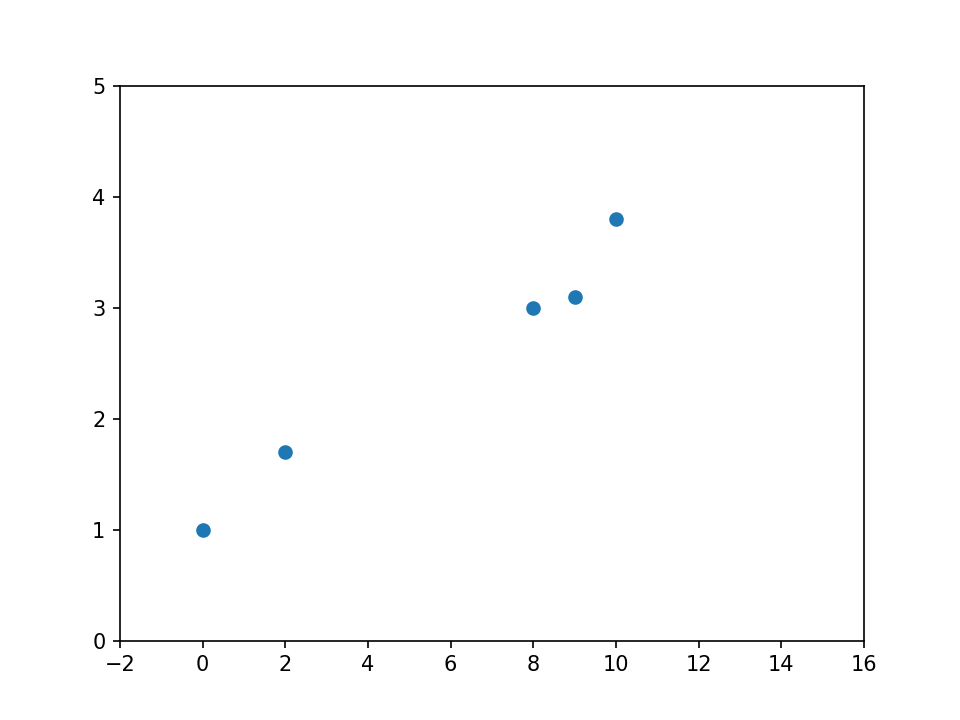

(0.0, 5.0)

In [7]:
plt.close()

plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Тези точки изглеждат горе-долу на една права. На око, нейната функция е $y = 0.25x + 1$.

При $x = 5$ очакваме нещо около $y = (0.25)(5) + 1 = 2.25$:

<IPython.core.display.Javascript object>


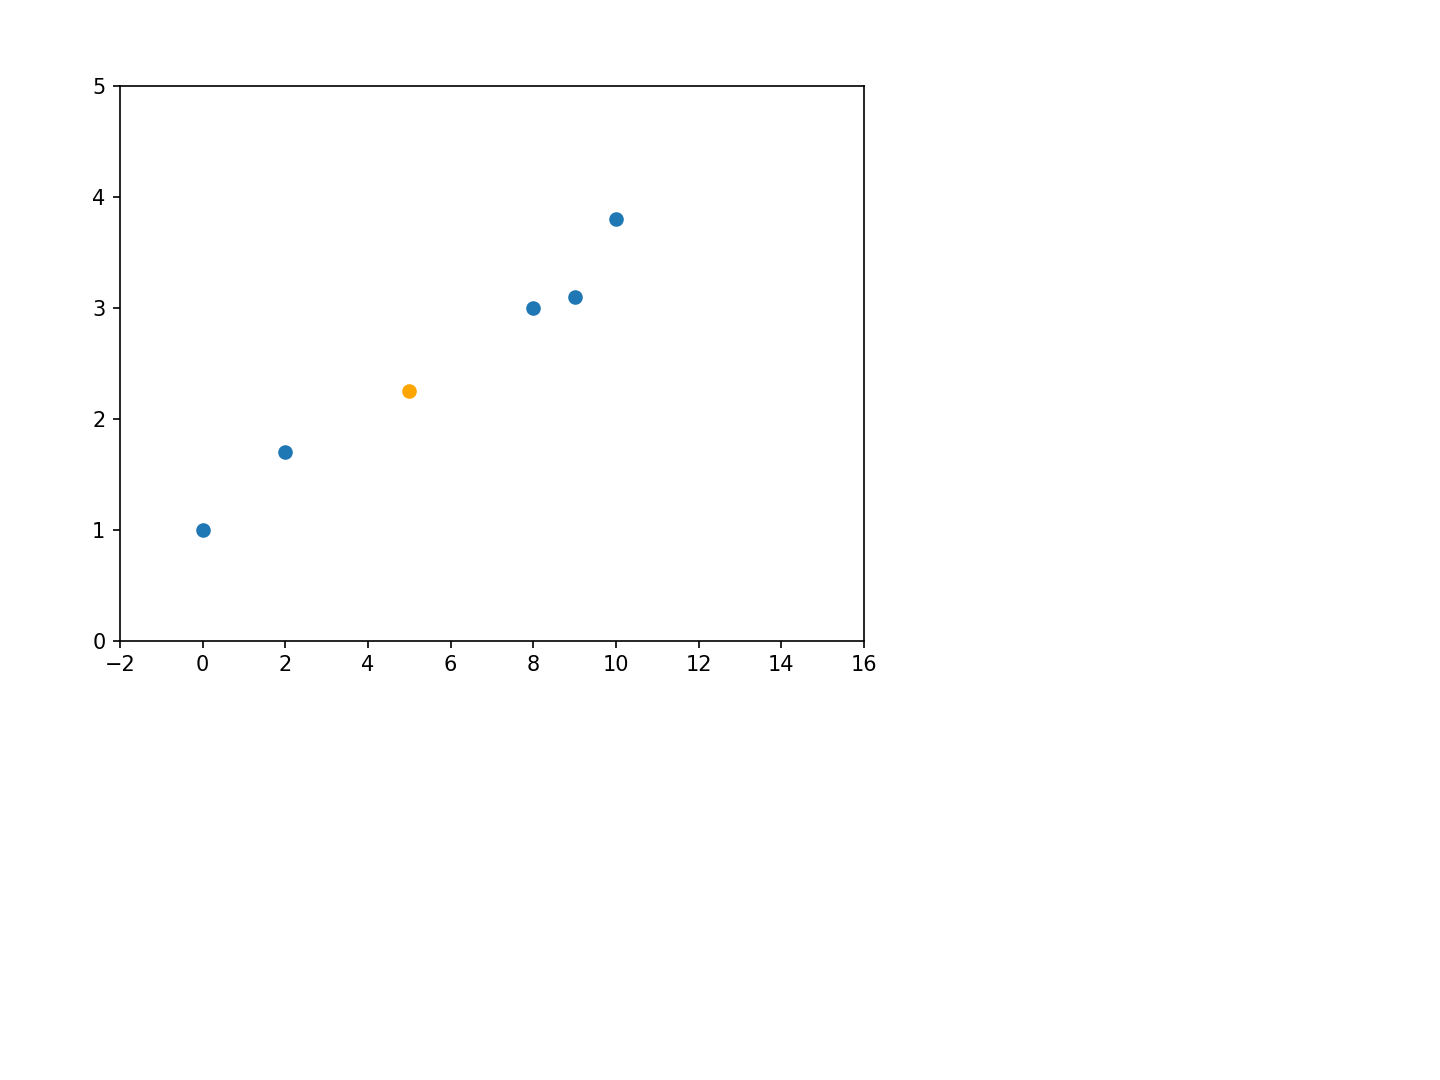

(0.0, 5.0)

In [8]:
plt.close()

plt.scatter(X[:, 0], y)
plt.scatter(np.array([5]), np.array([2.25]), color='orange')
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

### Линейна регресия в ScikitLearn 

В [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) са имплементирани множество от линейни модели, един от които е класа [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). В документацията на класа могат да се видят неговите параметри, атрибути, реализирани методи, както и примерен код за използването му.  
     
Основните методи, които класовете за ML алгоритми в `scikit-learn` имат, са: 
* `.fit()` - обучаване на алгоритъма с тренировъчни данни 
* `.predict()` - предвиждане върху нови данни 
* `.score()` - оценяване на алгоритъма (ще говорим повече за оценяване в следващите лекции) 

Нека ползваме `sklearn.linear_model.LinearRegression`, за да намерим линейна функция с минимална грешка спрямо входните данни:

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Това тренира модел (`model`), който открива коефициентите на функция, която търсим:

In [10]:
model.coef_, model.intercept_

(array([0.25024752]), 1.0685643564356444)

`coef_` съдържа коефициентите (в случая един), а `intercept_` съдържа константата. Това е достатъчно близко до функцията, която предположихме:

$$y = 0.25x + 1$$

Бихме могли да я начертаем върху точките и да се уверим (на око), че това е така:

<IPython.core.display.Javascript object>


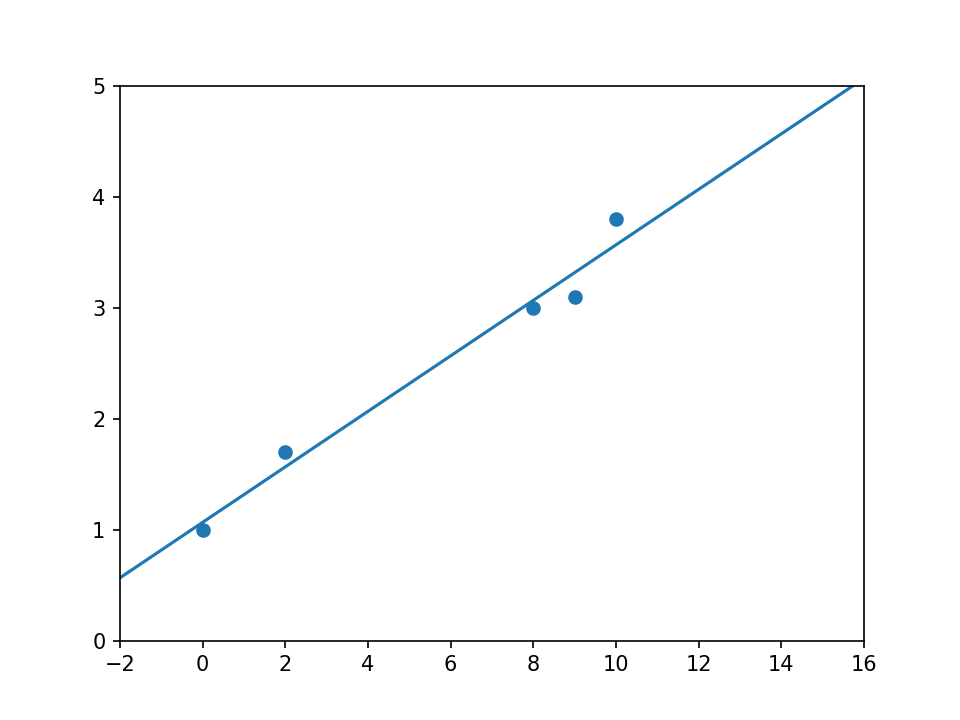

(0.0, 5.0)

In [11]:
interval = np.linspace(-2, 16)
result = interval * model.coef_[0] + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Може да направим предвиждане за някоя от точките (например 5):

In [12]:
model.predict(np.array([[5]]))

array([2.31980198])

Това е доста близо до очакваната стойност от наивния ни анализ ($2.25$).

Обърнете внимание, че `predict` взема масив от стойности, за които да направи предположение. Бихме могли да направим предвиждане за няколко точки:

In [13]:
model.predict(np.array([[5], [8], [12]]))

array([2.31980198, 3.07054455, 4.07153465])

# Генерализация

"Генарализация" наричаме способността на модела да прави вeрни предвиждания върху нови данни. Ако един модел се справя добре с това, казваме, че генерализира добре.

`scikit-learn` ни дава механизъм да оценим генерализацията:

In [14]:
model.score(X, y)

0.9753286334801561

Резултатът от `score` е реално число.

При класификация, тази оценка би била процент от случаите, в които алгоритъма предвижда отговора правилно. Например, ако $X$ бяха имейли, а $y$ е категория дали конкретен имейл е спам, `score = 0` би значело, че винаги даваме грешен отговор, а `score = 1` – винаги правилен.

При регресия е малко по-сложно, защото малки грешки в отговора не са проблем на практика - няма значение дали алгоритъма ще предвици цена на апартамент $200,000лв$ или $200,375лв$. Формулата е по-сложна е не толкова интересна на този етап ([детайли в документацията на scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)). Най-добрият резултат би бил 1, но числото може и да е отрицателно.

# Линейна регресия за нелинейни функции

Бихме могли да предвидим и нелинеен dataset. Например, нека пробваме с експоненциална функция: $2^x$

Имаме следния набор от данни:

<IPython.core.display.Javascript object>


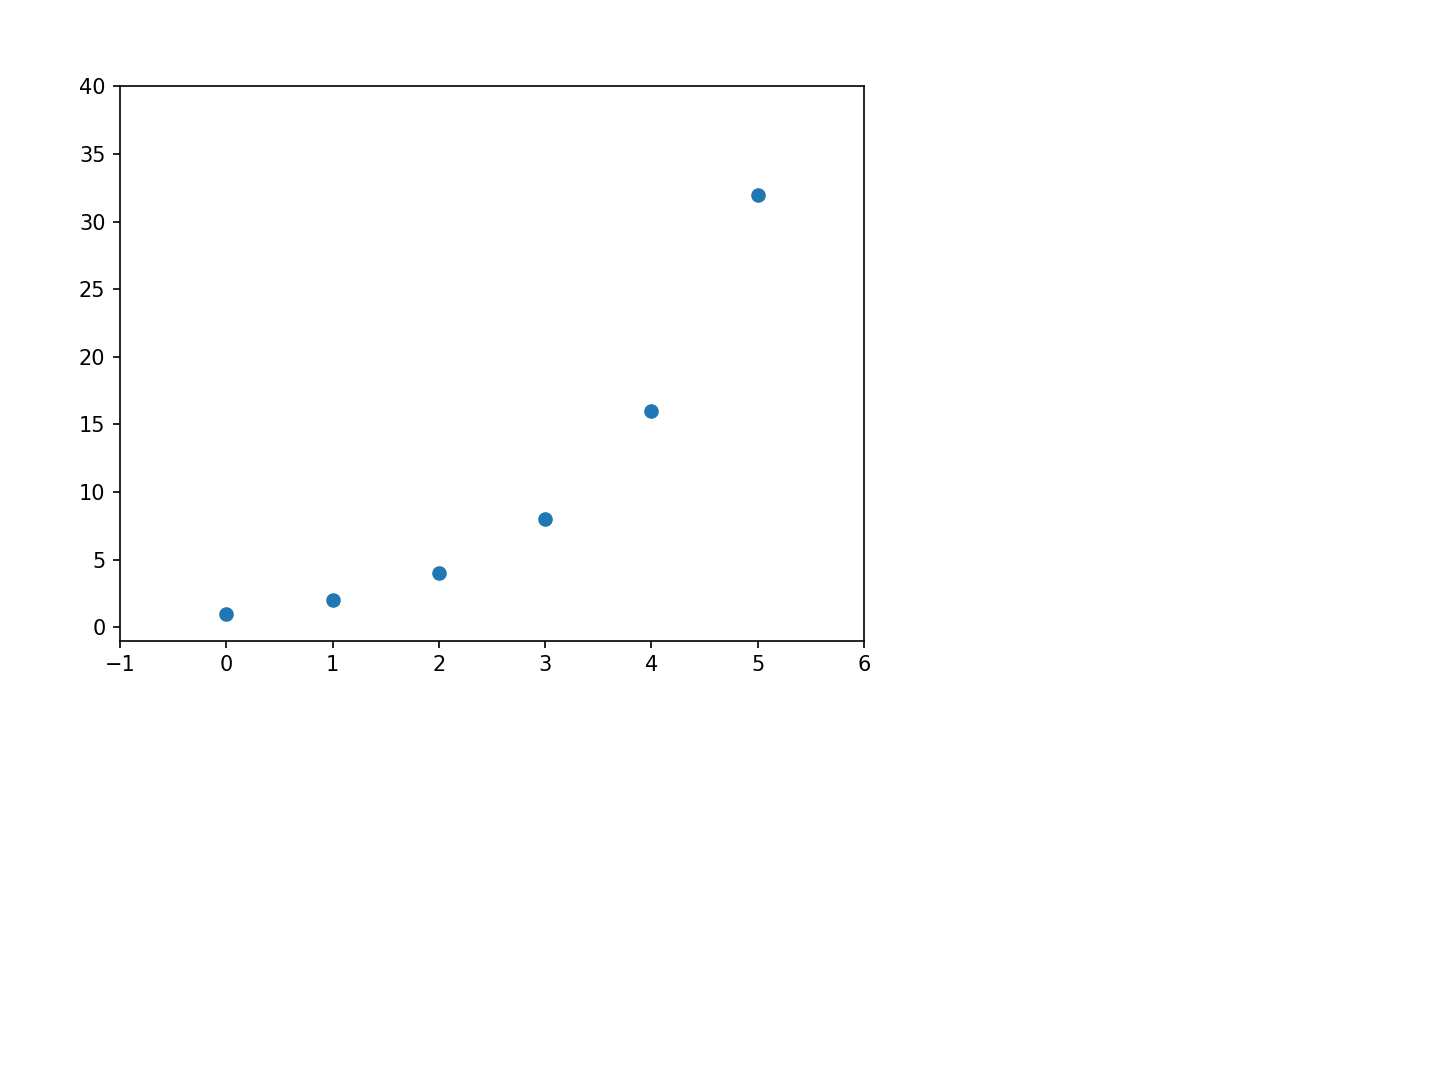

(-1.0, 40.0)

In [15]:
exp_data = np.array([[0, 1], [1, 2],  [2, 4], [3, 8], [4, 16], [5, 32]])

X, y = exp_data[:, 0:1], exp_data[:, 1]

plt.close()
plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 40)

Тази графика не е линейна. Въпреки това, ако обработим входните данни, прекарвайки ги през логаритмична функция, те ще приемат линейна форма:

<IPython.core.display.Javascript object>


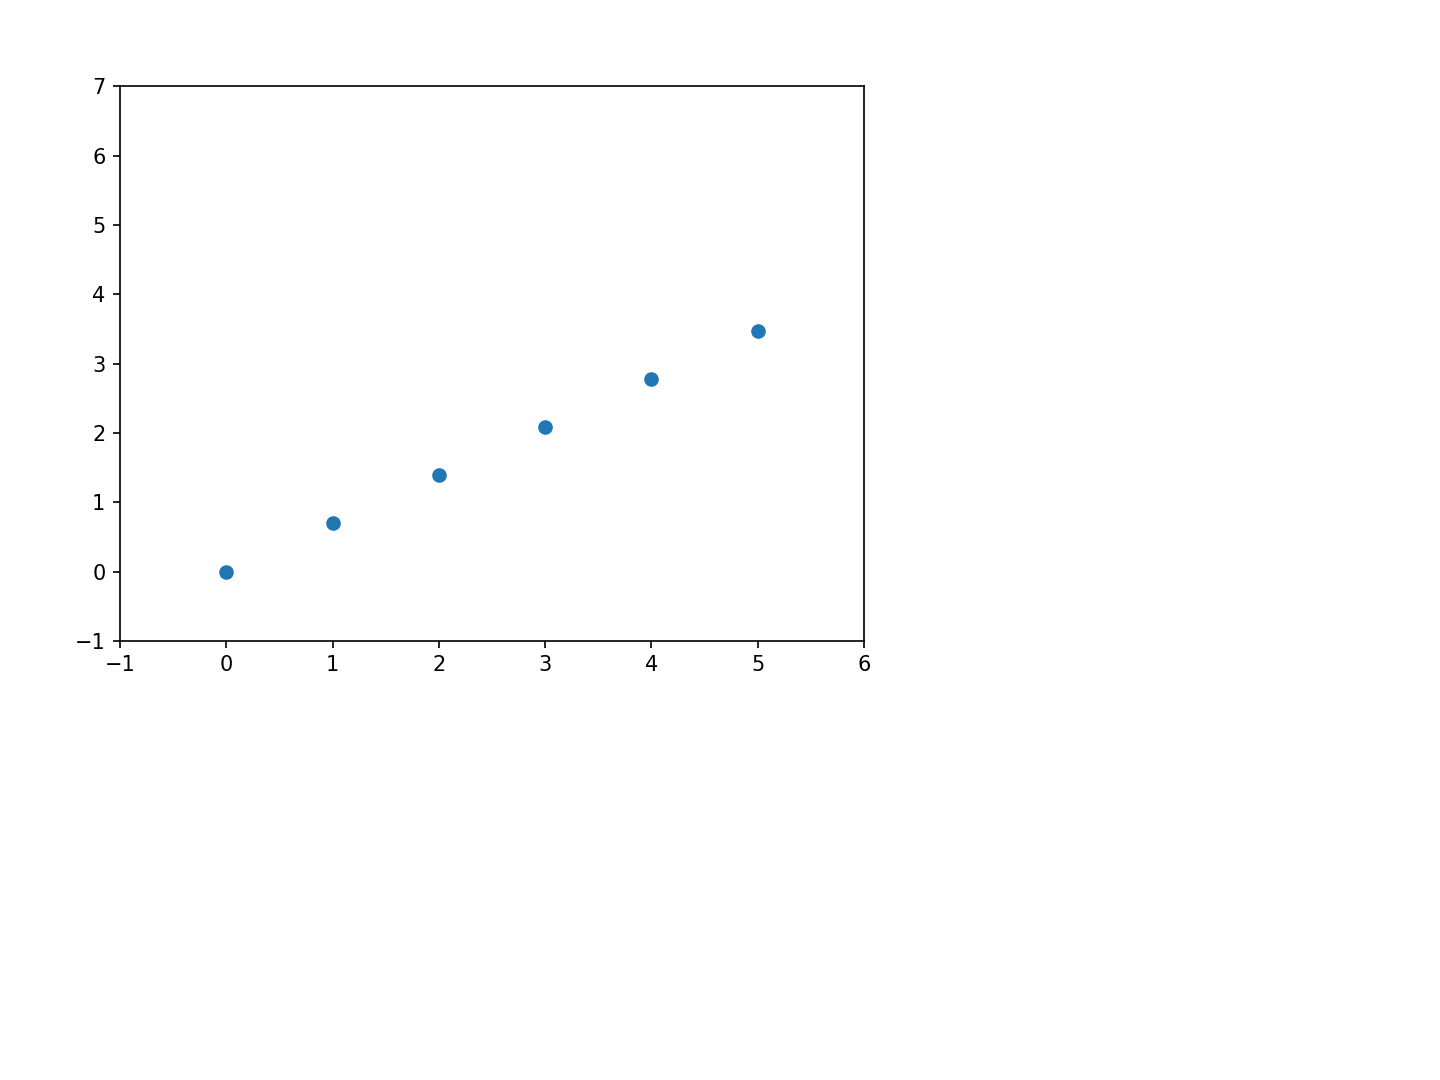

(-1.0, 7.0)

In [16]:
y_log = np.log(y)

plt.close()
plt.scatter(X, y_log)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 7)

Може да използваме линейна регресия върху новите данни, след което да обработим резултата:

In [17]:
model = LinearRegression()
model.fit(X, y_log)

prediction = model.predict(np.array([[8], [16]]))
np.exp(prediction)

array([  256., 65536.])

Обърнете внимание, че прекарваме резултата от предположението през експоненциална функция (за да обърнем логаритъма).

Ето как ще изглежда тази функция:

<IPython.core.display.Javascript object>


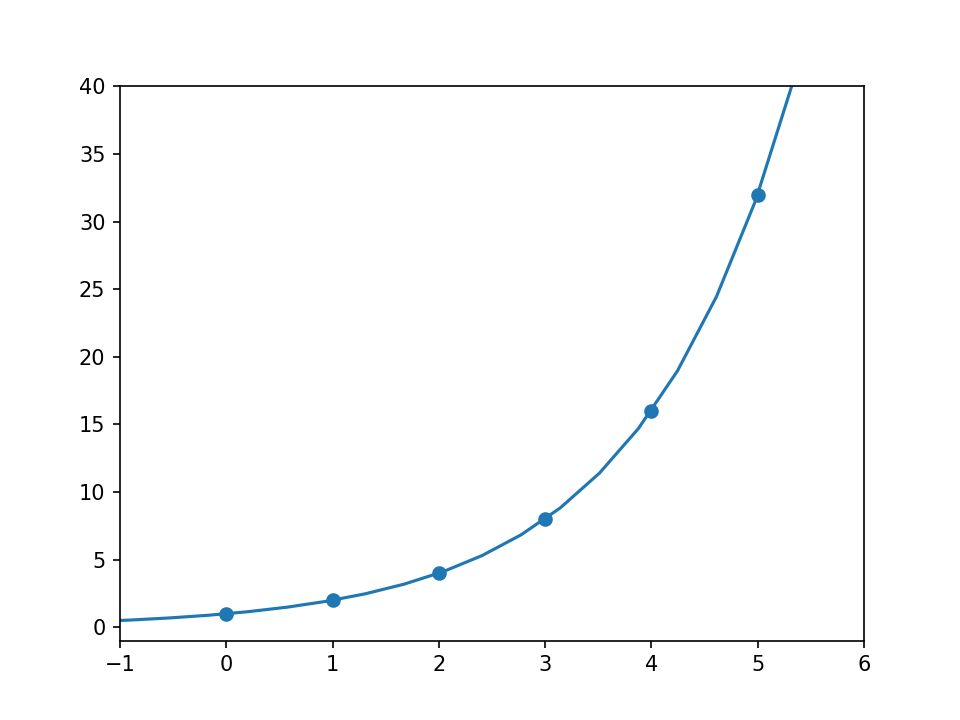

(-1.0, 40.0)

In [18]:
interval = np.linspace(-2, 16)
result = np.exp(interval * model.coef_[0] + model.intercept_)

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 40)

# Overfitting и underfitting

Тези две концепции се срещат постоянно:

* Underfitting – моделът се справя лошо с тренировъчните данни и генерализира лошо.
* Overfitting – моделът се справя много добре с тренировъчните данни, но генерализира лошо.

За да видим overfitting, нека пробваме да намерим полином от осма степен за оригиналния dataset.

<IPython.core.display.Javascript object>


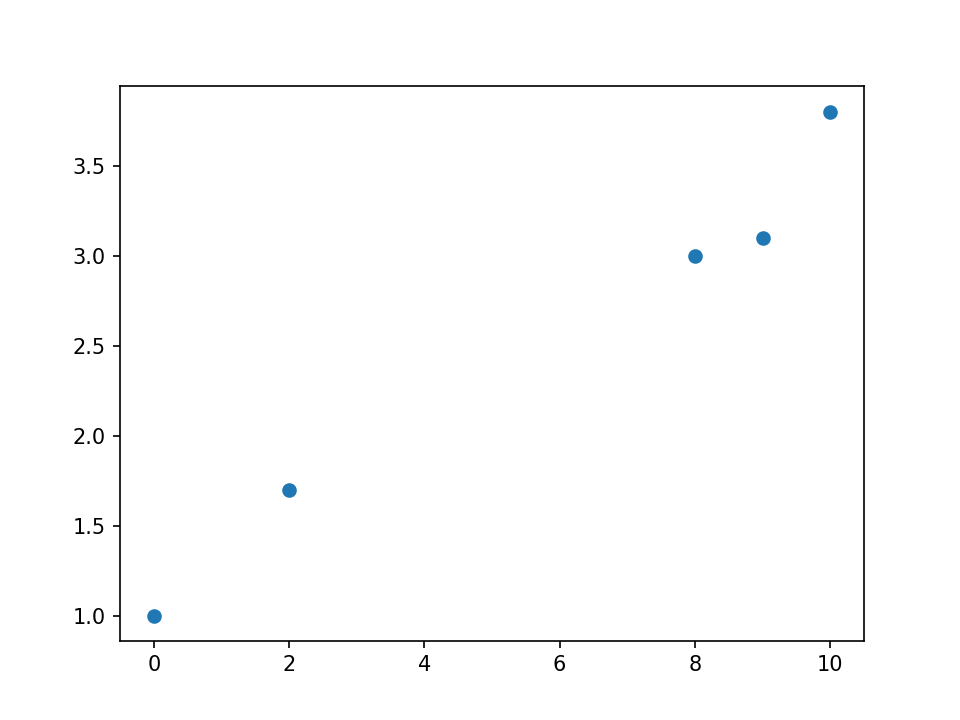

In [19]:
linear_data = np.array([[0, 1], [2, 1.7], [8, 3], [9, 3.1], [10, 3.8]])
X, y = linear_data[:, 0:1], linear_data[:, 1]

plt.close()
plt.scatter(X[:, 0], y)

Първо ще обработим оригиналните данни, създавайки нови характеристики – $x^2$, $x^3, \ldots, x^8$. Така входните данни ще бъдат вектори с 8 елемента, като всяка характеристика съответства на степен на оригиналната стойност.

In [20]:
X_poly = np.concatenate((X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8), axis=1)
X_poly

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 1.6000000e+01,
        3.2000000e+01, 6.4000000e+01, 1.2800000e+02, 2.5600000e+02],
       [8.0000000e+00, 6.4000000e+01, 5.1200000e+02, 4.0960000e+03,
        3.2768000e+04, 2.6214400e+05, 2.0971520e+06, 1.6777216e+07],
       [9.0000000e+00, 8.1000000e+01, 7.2900000e+02, 6.5610000e+03,
        5.9049000e+04, 5.3144100e+05, 4.7829690e+06, 4.3046721e+07],
       [1.0000000e+01, 1.0000000e+02, 1.0000000e+03, 1.0000000e+04,
        1.0000000e+05, 1.0000000e+06, 1.0000000e+07, 1.0000000e+08]])

Нека да пробваме да тренираме модел:

In [21]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

Този модел има следните коефициенти:

In [22]:
[model.intercept_, model.coef_]

[1.000000000005499,
 array([ 3.28311028e-03,  6.43300826e-03,  1.20812072e-02,  2.00031944e-02,
         2.17184447e-02, -8.86906561e-03,  1.04515266e-03, -3.96429474e-05])]

Ако начертаем полинома с тези компоненти, получаваме следното:

<IPython.core.display.Javascript object>


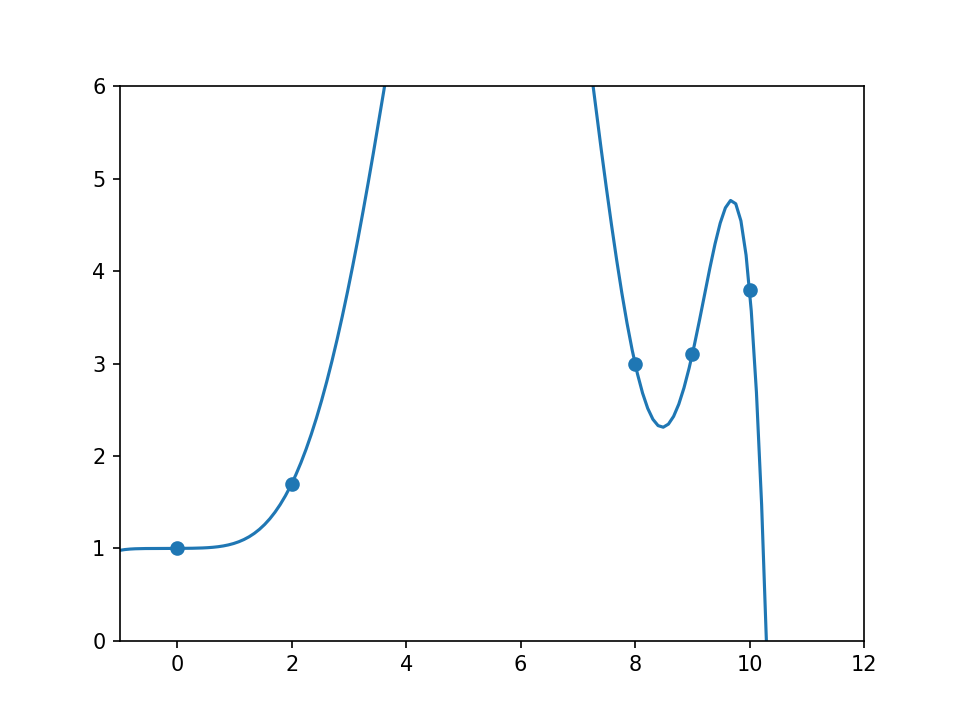

(0.0, 6.0)

In [23]:
interval = np.linspace(-2, 16, num=200)

@np.vectorize
def polynomial(x):
    return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, polynomial(interval))
plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)

Тук виждаме пренагаждане (overfitting) – намира се много по-сложен модел, който уцелва всички точки от данните, но генерализира лошо.

Това е интуитивно – бихме могли да прокараме полином от осма степен през 9 произволни точки (камо ли пет). За сметка на това не можем да намерим линейна функция за 5 точки точки (освен в частния случай, когато лежат на една права). Алгоритъмът намира функция без грешка на входнитe данни, но генерализира зле – $f(5)$ вече е стойност, съвсем различна от $2.25$. Допълнително, поведението извън интервала е $(0, 10)$ се разминава сериозно от очакваното.

In [24]:
(polynomial(5), polynomial(20))

(array(10.64740299), array(-171884.42547596))

Един от проблемите тук, е че имаме много малък dataset. При повече данни щяхме да имаме по-малък overfitting.

# Регуляризация

Повече модели прилагат някаква форма на регуляризация. Накратко, регуляризацията принуждава модела да бъде по-прост. Какво значи това зависи от конкретния алгоритъм.

В случая на линейната регресия, регуляризацията кара алгоритъма да минимизира коефициентите в линейното уравнение. Ниски коефициенти водят до по-прост линеен модел.

Ще видим два вида регуляризация от `scikit-learn` – [Lasso Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso), който използва L1 регуларизация,  и [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge), който използва L2 , регуралязация. Разликата между двете е в целевата функция. 

При L1 регуляризация:       
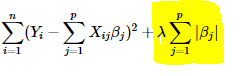        
Резултатът от нея е, че коефициентите пред слабовлияещи характеристики се минимизират до 0.

При L2 регуляризация:        
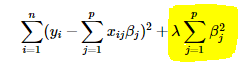       
Резултатът от нея е, че се наказват твърде големи коефициенти, като по този начин функцията става "по-гладка".

Повече за регуляризацията: [тук](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c).

In [25]:
# Тази функция е написана отделно за да се спести място в слайдовете. Ще се ползва по-долу.
def draw_regularization(algorithm, alpha=1):
    model = algorithm(alpha=alpha, max_iter=100000)
    model.fit(X_poly, y)
    
    interval = np.linspace(-2, 16, num=200)

    @np.vectorize
    def polynomial(x):
        return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

    plt.close()
    plt.scatter(X[:, 0], y)
    plt.plot(interval, polynomial(interval))
    plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)

# Ridge

`Ridge` използва L2 регуляризация. Ефектът е, че графиката е "по-изгладена".

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X, y)

Ridge(alpha=1)

<IPython.core.display.Javascript object>


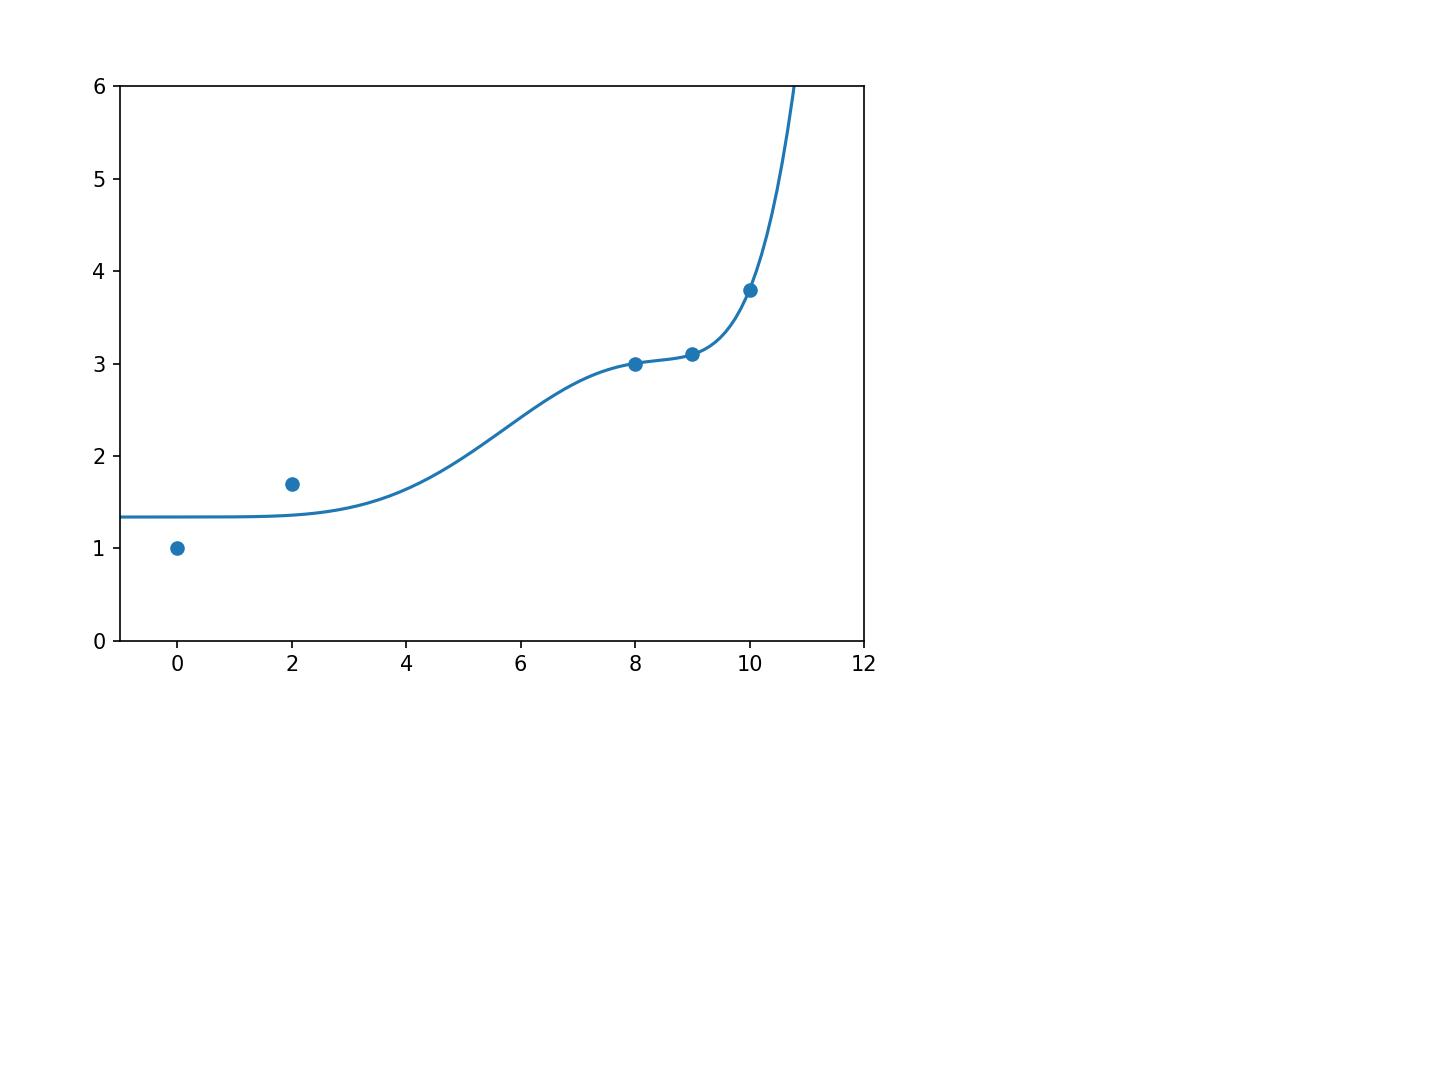

In [27]:
draw_regularization(Ridge, alpha=10000)

In [28]:
regression = LinearRegression()
regression.fit(X_poly, y)

ridge = Ridge(alpha=10000)
ridge.fit(X_poly, y)

[regression.coef_, ridge.coef_]

[array([ 3.28311028e-03,  6.43300826e-03,  1.20812072e-02,  2.00031944e-02,
         2.17184447e-02, -8.86906561e-03,  1.04515266e-03, -3.96429474e-05]),
 array([ 6.75667714e-05,  1.32554856e-04,  2.49888134e-04,  4.18842516e-04,
         4.79440470e-04, -8.72893494e-05,  1.70525621e-06,  2.03011107e-07])]

Може да пробваме и с `Lasso`:

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10000)
lasso.fit(X_poly, y)

Lasso(alpha=10000)

<IPython.core.display.Javascript object>


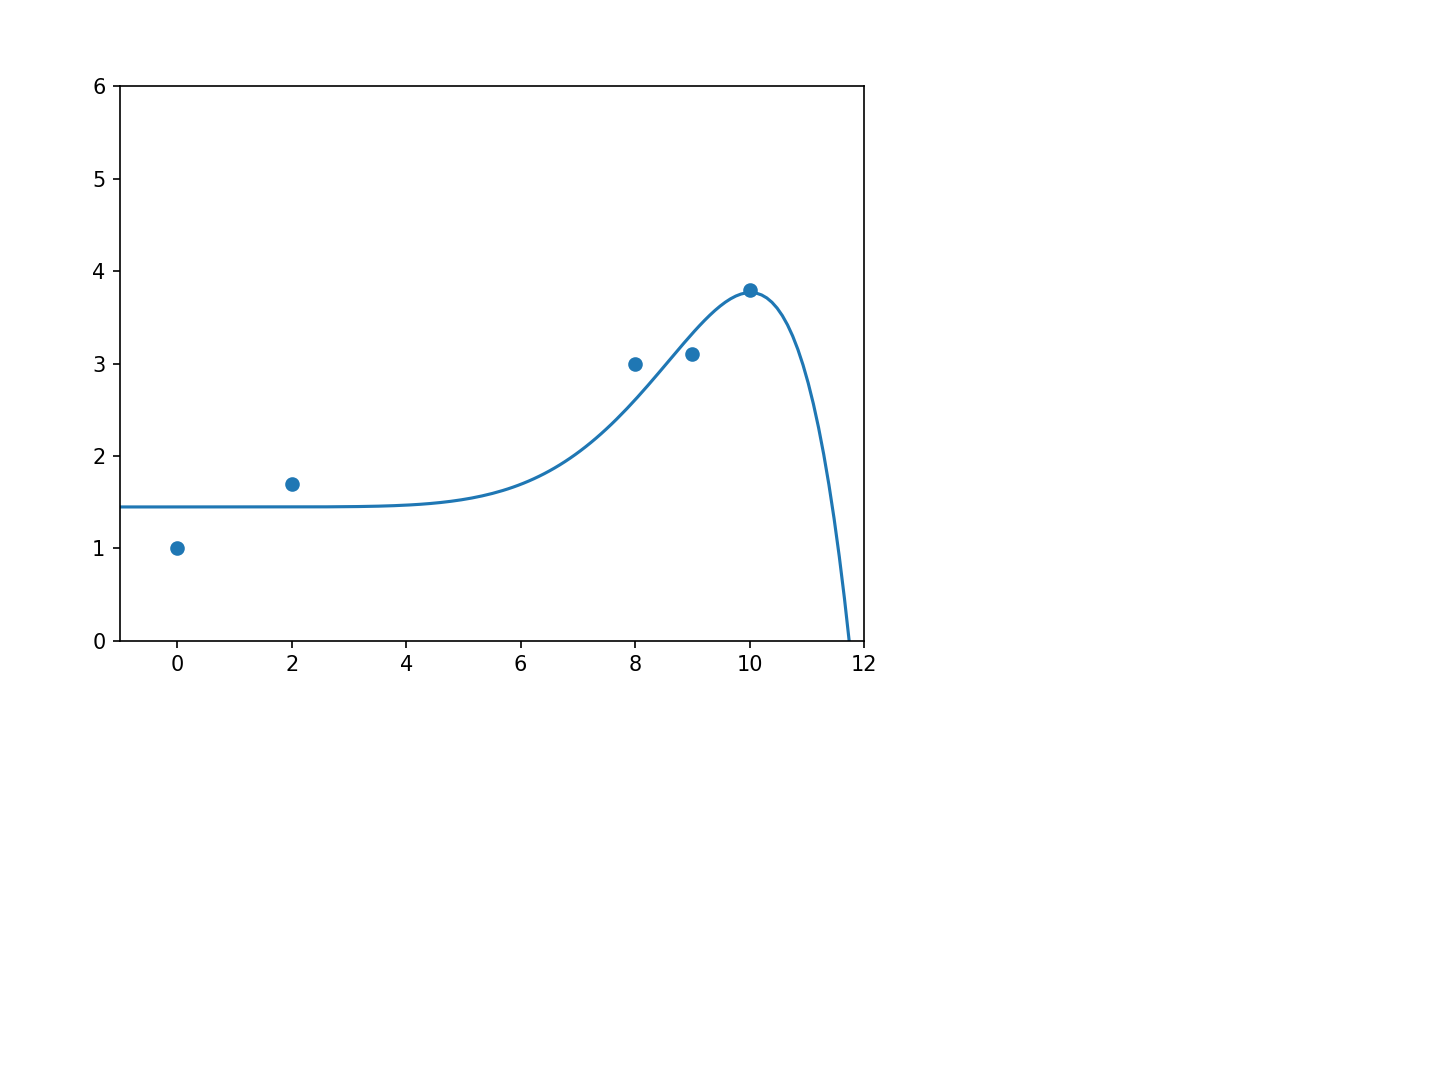

In [30]:
draw_regularization(Lasso, alpha=10000)

`Lasso` ползва L1 регуляризация. Разликата отново е математическа (и детайлите са нерелавнтни за момента), но `Lasso` може да намали някои коефициенти до 0, за разлика от `Ridge`. Така биха елиминирани характеристики, които не носят информация. Това е полезно за избор на характеристики (feature selection). 

# Тренировъчно и тестово множество (Train & test sets)

Обикновено разделяме данните на две части – тренировъчни (training set) и тестови (test set). Използваме тренировъчните данни да обучим модела, а тестовите - да оценим как той генерализира. Ако и двете числа са ниски, това е симптом за underfitting - алгоритъма не е направил достатъчно добър модел върху данните. Ако оценката над тренировъчните данни е висока, но тази над тестовите е ниска, обикновено има пренагаждане към тренировъчните данни (overfitting).

`scikit-learn` предоставя функции за разделяне на данните на тези две множества, една от които е [model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).        

Ако изрично не дадем на функцията параметър за това каква част от данните искаме да са тренировъчни, и каква тестови, тя ще върне 75% като тренировъчни и 25% като тестови. 

**NB**: В практиката често се използва деление на три множества: train-dev-test split, за да не се пренагажда алгоритъма твърде много към тестовите данни (подобно на студент, който знае какви въпроси ще се паднат на изпита и назубря тези въпроси, вместо да разбира в дълбочина материала). При тази схема, по време на експериментите за избор на алгоритъм и параметри, се тества върху dev set, а крайната оценка на избрания модел се прави върху test set. 

Има и други схеми за разделяне на данните, които ще разгледаме по-нататък в курса.

Нека пробваме с един синтетичен dataset:

In [31]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.67
Test score:     0.66


$0.66$ е ниско (около 66% вярно) - вероятно този модел не генерализира достатъчно добре (underfit-ва).

Да пробваме с апартаментите:

In [32]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression().fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.95
Test score:     0.61


Тук вече има overfitting. Това лесно може да се случи при многомерни пространства.

Може да пробваме да решим този проблем с регуляризация:

In [33]:
model = Ridge(alpha=1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.89
Test score:     0.75


Променяйки `alpha` параметъра получаваме различни резултати:

In [34]:
model = Ridge(alpha=10).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.79
Test score:     0.64


Резултатът тук се влошава – вероятно регуляризацията е твърде голяма. Може да пробваме да я намалим.

In [35]:
model = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.93
Test score:     0.77


Тук имаме малко по-добър резултат.

Нека пробваме с `Lasso`:

In [36]:
model = Lasso(alpha=1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.29
Test score:     0.21
Features used:  4/104


Резултатът е много по-лош, но виждаме, че само 4 характеристики се ползват. Алгоритъмът смята другите за неинформативни.

Бихме могли да подобрим резултата като намалим регуляризацията:

In [37]:
model = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.90
Test score:     0.77
Features used:  33/104


Ако продължим да я намаляваме, обаче, ще стигнем до overfitting.

In [38]:
model = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.95
Test score:     0.64
Features used:  96/104


# Логистична регресия

Въпреки името, това е алгоритъм за класификация. Същото е като линейна регресия, единствената разлика е, че резултатът се прекарва през сигмоид (sigmoid).

Сигмоидът е тази функция:

$$f(x) = \frac{1}{1 + e^{-x}}$$

<IPython.core.display.Javascript object>


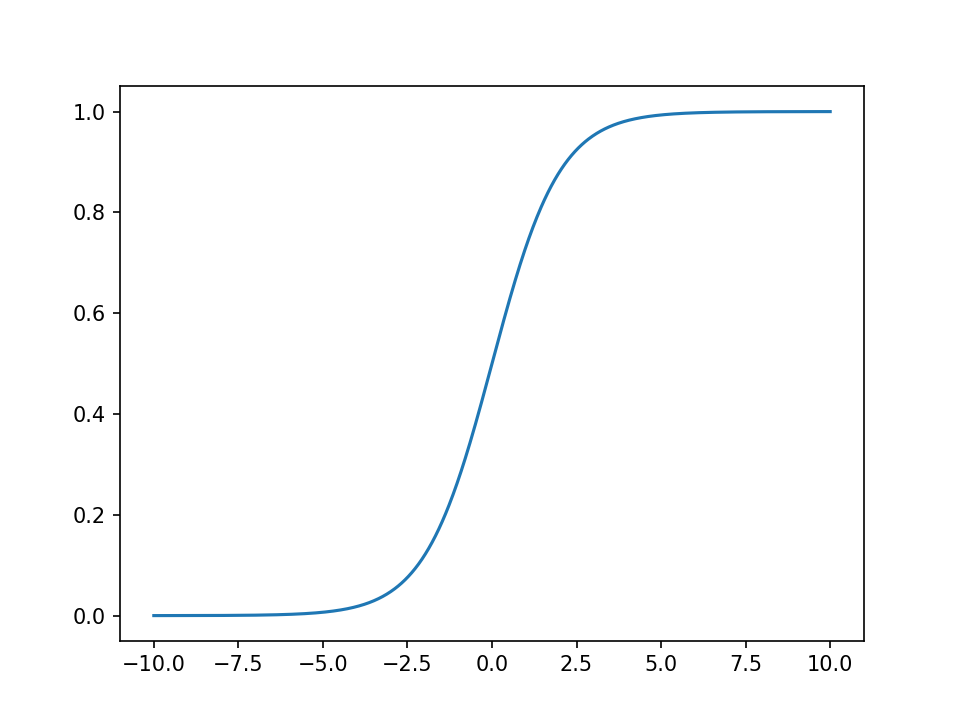

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

interval = np.linspace(-10, 10, num=1000)

plt.close()
plt.plot(interval, sigmoid(interval))

Тази функция е 0.5 в нулата и клони към 1 за $+\infty$ и към 0 за $-\infty$.

Може да ползваме двете граници за два отделни класа при класификация. Например, ако предвиждаме дали даден имейл е спам, 0 може да значи "не" и 1 може да значи "да".

Може да я ползваме да класифицираме [данните за рак на гърдата](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [43]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [50]:
cancer.data.shape

(569, 30)

In [44]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

regression = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(regression.score(X_train, y_train)))
print("Test set score:     {:.3f}".format(regression.score(X_test, y_test)))

Training set score: 0.962
Test set score:     0.965


С регуляризация може да постигнем и по-добри резултати:

In [49]:
regression = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(regression.score(X_train, y_train)))
print("Test set score:     {:.3f}".format(regression.score(X_test, y_test)))

Training set score: 0.977
Test set score:     0.965


Няма нищо сложно и магическо в логистичната регресия – единствената разлика е, че линейната функция минава през сигмоид.

Малка статистическа бележка:

Горният алгоритъм дава верен отговор в 96,5% от ситуациите. Това е информативно, когато двата класа са приблизително равномерно представени. Но ако единия е малък процент от другия, имаме проблем.

Нека да си представим алгоритъм, който предвижда дали даден човек има рядко заболяване, налично в само 1% от хората. Ако 99% от данните са хора без заболяването и 1% го имат, тогава е много лесно да направим алгоритъм с 99% точност, като винаги отговаряме с "не". В такива случаи е важно да вземем предвид по-редкия случай и да го разгледаме отделно – по-важен въпрос е колко хора със заболяване биват правилно идентифицирани. Може да има и значение, ако различният вид грешка има различна цена – неправилно класифициран "болен" може да резултира в излишни (но безобидни) изследвания, но неправилно класифициран "здрав" рискува да пропусне лечение.

За подобни случаи има по-адекранти методи за оценка, които ще разгледаме в следващи лекции. 

# Задачи 

* Разгледайте примерните множества от данни в scikitlearn. 
* Заредете някое от примерните множества, разделете го на test/train set и пуснете логистична или линейна регресия върху него. 
* Пробвайте се да подобрите резултата чрез регуляризация. 